Validation Set Evaluation:

Linear Regression Evaluation:
  MSE: 0.9131, RMSE: 0.9556, MAE: 0.7265, R2: 0.4545

------------------------------------------------

Ridge Regression Evaluation:
  MSE: 0.9099, RMSE: 0.9539, MAE: 0.7268, R2: 0.4564

------------------------------------------------

Lasso Regression Evaluation:
  MSE: 1.6957, RMSE: 1.3022, MAE: 1.1257, R2: -0.0131

------------------------------------------------

Decision Tree Evaluation:
  MSE: 1.4162, RMSE: 1.1900, MAE: 0.9327, R2: 0.1539

------------------------------------------------



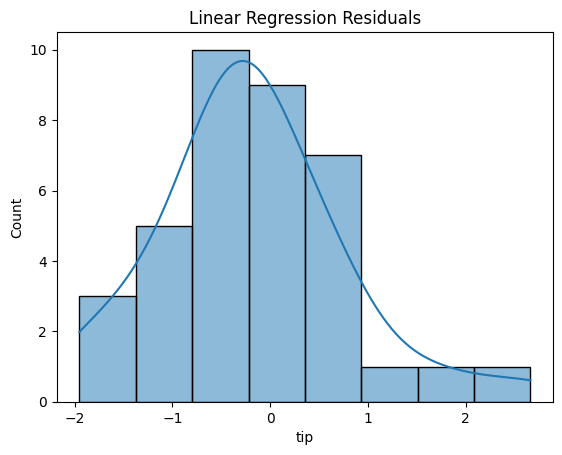

In [5]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler


tips = pd.read_csv("/content/tips.csv")
# Feature Engineering: One-Hot Encoding
categorical_cols = ['sex', 'smoker', 'day', 'time']
encoder = OneHotEncoder(drop='first', sparse_output=False)  # Drop first to avoid multicollinearity
encoded_cols = encoder.fit_transform(tips[categorical_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols))
tips = pd.concat([tips.drop(categorical_cols, axis=1), encoded_df], axis=1)

# Scaling Numerical Features
numerical_cols = ['total_bill', 'size']
scaler = StandardScaler()
tips[numerical_cols] = scaler.fit_transform(tips[numerical_cols])

# Splitting Data
X = tips.drop('tip', axis=1)
y = tips['tip']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
lr_pred = linear_model.predict(X_test)  # Make predictions
# Ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Lasso Regression
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
lasso_pred = lasso_model.predict(X_test)

# Random Forest Regressor
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)
def evaluate_model(model, X, y, name="Model"):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    print(f"{name} Evaluation:")
    print(f"  MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
    print("\n------------------------------------------------\n")
print("Validation Set Evaluation:\n")
evaluate_model(linear_model, X_val, y_val, "Linear Regression")
evaluate_model(ridge_model, X_val, y_val, "Ridge Regression")
evaluate_model(lasso_model, X_val, y_val, "Lasso Regression")
evaluate_model(tree_model, X_val, y_val, "Decision Tree")

# Residual Analysis (for Linear Regression as an example)
residuals = y_val - linear_model.predict(X_val)
sns.histplot(residuals, kde=True)
plt.title("Linear Regression Residuals")
plt.show()